Адаптируем модель KNN для задачи регресии на данных для курсового проекта

In [42]:
import numpy as np
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt

In [18]:
TRAIN = 'train.csv'
TEST = 'test.csv'
df_correct_file = 'df_correct.csv'

In [19]:
df = pd.read_csv(TRAIN)
df_correct = pd.read_csv(df_correct_file)

In [20]:
# Получим полные рабочие данные в нумпай
y_train = df['mean_exam_points'].to_numpy()
X_train = df.drop(['mean_exam_points','Id'],axis=1).to_numpy()
X_train_correct = df_correct.drop(['mean_exam_points','Id'],axis=1).to_numpy()

In [21]:
X_train_work=df_correct.drop(['rating','sum_disciplines','history','geography','mean_exam_points','Id','age'],axis=1).to_numpy()

In [22]:
# Обрежим выборку, что бы быстрее работало:
a = np.arange(10000)
ind = np.random.choice(a,size = 1000,replace=False)
x_train_limit = X_train_work[ind]
y_train_limit = y_train[ind]

In [23]:
X_tr,X_te, y_tr,y_t = model_selection.train_test_split(x_train_limit, y_train_limit, test_size=0.25, random_state=1)

In [24]:
# клас для расчета веса по номеру соседа
class Knn_w_n():
    def __init__ (self):
        self.x_train=None
        self.y_train=None
        self.x_test=None
        self.k=None
        self.answer = None
        
    def e_metrics(self,x1, x2):   
        return np.sqrt(((x1-x2)**2).sum())  
    
    def predict(self,x_train, y_train, x_test, k,q=0.9):
        self.x_train=x_train
        self.y_train=y_train
        self.x_test=x_test
        self.k=k
        self.q = q
        answers = []
        for x in x_test:
            test_distances = []

            for i in range(len(x_train)):

                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = self.e_metrics(x, x_train[i])

                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append((distance, y_train[i]))

            # создаем словарь со всеми возможными классами
#             classes = {class_item: 0 for class_item in set(y_train)}

#             создадим список весов
            w=[q**i for i in range(k)]
            # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов           
            s=0
            for i,d in enumerate(sorted(test_distances)[0:k]):
                s+=d[1]*w[i]         
            answers.append(s/sum(w))
        self.answer = answers
        return answers
    
    def accuracy(self,y):
        return (sum(self.answer == y) / len(y))
    
    def r2 (self,y_test):
         return 1- ((self.answer - y_test)**2).sum()/((y_test-y_test.mean())**2).sum()

In [25]:
# клас для расчета пос редней между соседями без учета весов
class Knn():
    def __init__ (self):
        self.x_train=None
        self.y_train=None
        self.x_test=None
        self.k=None
        self.answer = None
        
    def e_metrics(self,x1, x2):   
        return np.sqrt(((x1-x2)**2).sum())  
    
    def predict(self,x_train, y_train, x_test, k):
        self.x_train=x_train
        self.y_train=y_train
        self.x_test=x_test
        self.k=k  
        answers = []
        for x in x_test:
            test_distances = []

            for i in range(len(x_train)):

                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = self.e_metrics(x, x_train[i])

                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append((distance, y_train[i]))

            # создаем словарь со всеми возможными классами
#             classes = {class_item: 0 for class_item in set(y_train)}

#             создадим список весов
#             w=[0.9**i for i in range(k)]
            # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов           
            s=0
            for d in sorted(test_distances)[0:k]:
                s+=d[1]         
            answers.append(s/k)
        self.answer = answers
        return answers
    
    def accuracy(self,y):
        return (sum(self.answer == y) / len(y))
    
    def r2 (self,y_test):
         return 1- ((self.answer - y_test)**2).sum()/((y_test-y_test.mean())**2).sum()

In [35]:
# клас для расчета пос редней между соседями без учета весов
class Knn_w_d():
    def __init__ (self):
        self.x_train=None
        self.y_train=None
        self.x_test=None
        self.k=None
        self.answer = None
        
    def e_metrics(self,x1, x2):   
        return np.sqrt(((x1-x2)**2).sum())  
    
    def predict(self,x_train, y_train, x_test, k,q=0.9):
        self.x_train=x_train
        self.y_train=y_train
        self.x_test=x_test
        self.k=k 
        self.q = q
        answers = []
        for x in x_test:
            test_distances = []

            for i in range(len(x_train)):

                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = self.e_metrics(x, x_train[i])

                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append((distance, y_train[i]))

            # создаем словарь со всеми возможными классами
#             classes = {class_item: 0 for class_item in set(y_train)}

#             создадим список весов
#             w=[0.9**i for i in range(k)]
            # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов           
            s=0
            w = 0
            for d in sorted(test_distances)[0:k]:
                s+=d[1]*q**d[0] 
                w+=q**d[0]
            answers.append(s/w)
        self.answer = answers
        return answers
    
    def accuracy(self,y):
        return (sum(self.answer == y) / len(y))
    
    def r2 (self,y_test):
         return 1- ((self.answer - y_test)**2).sum()/((y_test-y_test.mean())**2).sum()

In [27]:
def R2 (y_pred,y_test):
         return 1- ((y_pred - y_test)**2).sum()/((y_test-y_test.mean())**2).sum()

In [28]:
def testing_algoritms():
    test1 = Knn_w_n()
    test2 = Knn()
    test3=Knn_w_d()
    results  = pd.DataFrame(columns=['k','q','num','dist','mean'])
    for i in [0.5,0.6,0.8,0.9]:
        for j in [10,15,20,25]:
            test1.predict(X_tr, y_tr, X_te, j,q=i)
            test2.predict(X_tr, y_tr, X_te, j)
            test3.predict(X_tr, y_tr, X_te, j,q=i)
            results.loc[len(results)]=[j,i,test1.r2(y_t),test3.r2(y_t),test2.r2(y_t)]
    print(results)
    return results 

In [36]:
res = testing_algoritms()

       k    q       num      dist      mean
0   10.0  0.5  0.599039  0.643963  0.659804
1   15.0  0.5  0.599288  0.650332  0.669925
2   20.0  0.5  0.599293  0.642418  0.653835
3   25.0  0.5  0.599293  0.638597  0.637379
4   10.0  0.6  0.627693  0.640915  0.659804
5   15.0  0.6  0.628811  0.646843  0.669925
6   20.0  0.6  0.628858  0.636903  0.653835
7   25.0  0.6  0.628863  0.631472  0.637379
8   10.0  0.8  0.660547  0.634679  0.659804
9   15.0  0.8  0.668109  0.640042  0.669925
10  20.0  0.8  0.668186  0.626401  0.653835
11  25.0  0.8  0.668487  0.617347  0.637379
12  10.0  0.9  0.663813  0.632478  0.659804
13  15.0  0.9  0.674935  0.637900  0.669925
14  20.0  0.9  0.671263  0.622640  0.653835
15  25.0  0.9  0.669762  0.611671  0.637379


In [37]:
res.sort_values(by=['num','dist','mean'],ascending=False).head(15)

,k,q,num,dist,mean
13,15.0,0.9,0.674935,0.637900,0.669925
14,20.0,0.9,0.671263,0.622640,0.653835
15,25.0,0.9,0.669762,0.611671,0.637379
11,25.0,0.8,0.668487,0.617347,0.637379
10,20.0,0.8,0.668186,0.626401,0.653835
9,15.0,0.8,0.668109,0.640042,0.669925
12,10.0,0.9,0.663813,0.632478,0.659804
8,10.0,0.8,0.660547,0.634679,0.659804
7,25.0,0.6,0.628863,0.631472,0.637379
6,20.0,0.6,0.628858,0.636903,0.653835


In [38]:
res.sort_values(by=['dist','mean','num'],ascending=False).head(15)

,k,q,num,dist,mean
1,15.0,0.5,0.599288,0.650332,0.669925
5,15.0,0.6,0.628811,0.646843,0.669925
0,10.0,0.5,0.599039,0.643963,0.659804
2,20.0,0.5,0.599293,0.642418,0.653835
4,10.0,0.6,0.627693,0.640915,0.659804
9,15.0,0.8,0.668109,0.640042,0.669925
3,25.0,0.5,0.599293,0.638597,0.637379
13,15.0,0.9,0.674935,0.637900,0.669925
6,20.0,0.6,0.628858,0.636903,0.653835
8,10.0,0.8,0.660547,0.634679,0.659804


In [40]:
res.sort_values(by=['mean','dist','num'],ascending=False).head(15)

,k,q,num,dist,mean
1,15.0,0.5,0.599288,0.650332,0.669925
5,15.0,0.6,0.628811,0.646843,0.669925
9,15.0,0.8,0.668109,0.640042,0.669925
13,15.0,0.9,0.674935,0.637900,0.669925
0,10.0,0.5,0.599039,0.643963,0.659804
4,10.0,0.6,0.627693,0.640915,0.659804
8,10.0,0.8,0.660547,0.634679,0.659804
12,10.0,0.9,0.663813,0.632478,0.659804
2,20.0,0.5,0.599293,0.642418,0.653835
6,20.0,0.6,0.628858,0.636903,0.653835


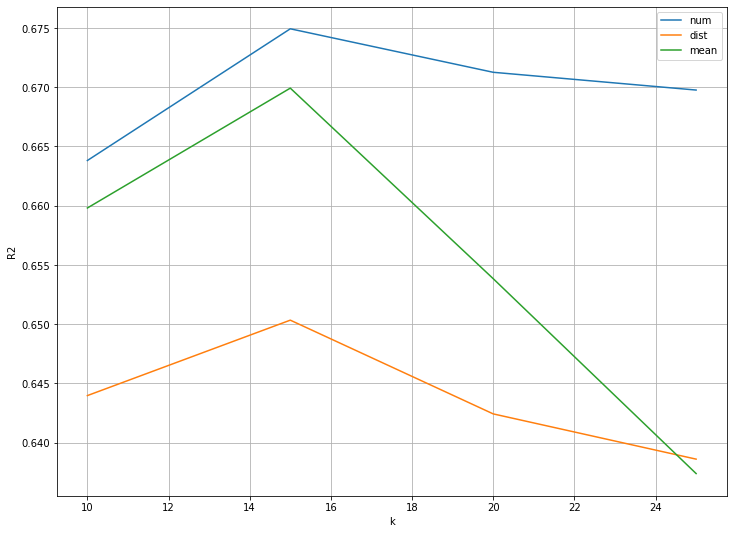

In [45]:
# Максимальные значения метрик при разных q
plt.figure(figsize=(12, 9))
plt.grid()
plt.plot(res.groupby(by=['k']).max().index,res.groupby(by=['k']).max()['num'],label = 'num')
plt.plot(res.groupby(by=['k']).max().index,res.groupby(by=['k']).max()['dist'],label = 'dist')
plt.plot(res.groupby(by=['k']).max().index,res.groupby(by=['k']).max()['mean'],label = 'mean')
plt.xlabel('k')
plt.ylabel('R2')
plt.legend()

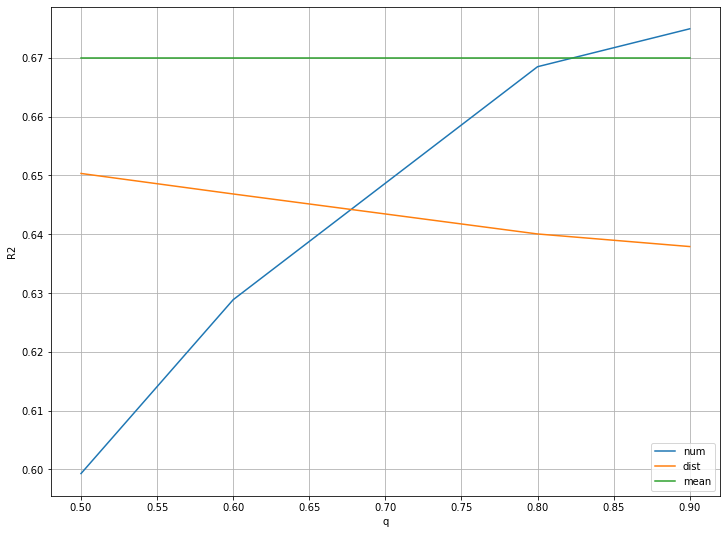

In [46]:
plt.figure(figsize=(12, 9))
plt.grid()
plt.plot(res.groupby(by=['q']).max().index,res.groupby(by=['q']).max()['num'],label = 'num')
plt.plot(res.groupby(by=['q']).max().index,res.groupby(by=['q']).max()['dist'],label = 'dist')
plt.plot(res.groupby(by=['q']).max().index,res.groupby(by=['q']).max()['mean'],label = 'mean')
plt.xlabel('q')
plt.ylabel('R2')
plt.legend()

KNN дает результаты лучше чем линейная регрессия